In [231]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree,datasets
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=(14,10)

In [232]:
#reading data
data = pd.read_csv('stroke.csv')

In [233]:
#exploring the data

data.shape

(5110, 12)

In [234]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [235]:
#features of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [236]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [237]:
#finding the missing values in dataset

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [238]:
#normalizing the data by replacing the missing entries with mean value

data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [239]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [240]:
#removing unnecessary features from the dataset

data.drop('id',axis=1,inplace=True)

In [241]:
data.shape

(5110, 11)

In [242]:
#stroke counts
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [243]:
#correlation
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [244]:
from matplotlib.pyplot import figure
figure(num=None,figsize=(8,6),dpi=800,facecolor='w',edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

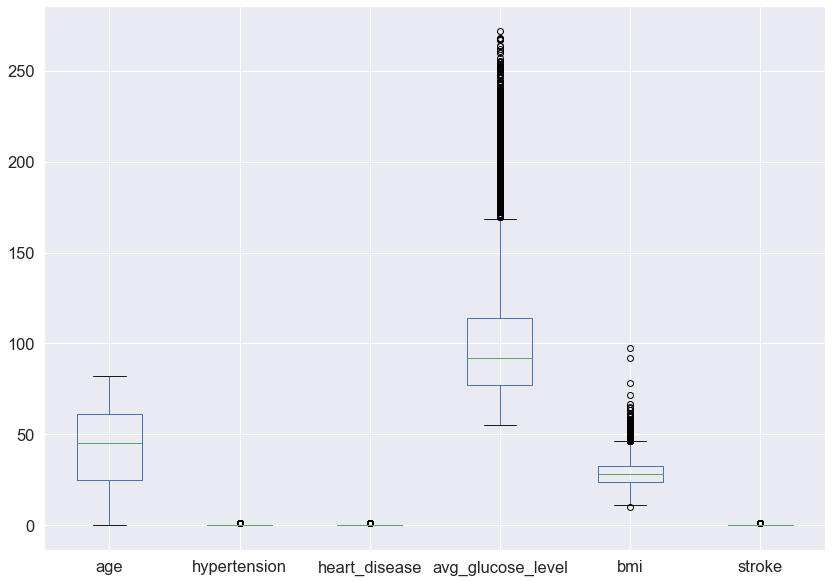

In [245]:
#finding outliers

data.plot(kind='box')
plt.show()

In [246]:
#label encoding

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [247]:
#encoding labels : gender,smoking_status,work_type,residence_type,ever_married

gender = enc.fit_transform(data['gender'])
smoking_status = enc.fit_transform(data['smoking_status'])
work_type = enc.fit_transform(data['work_type'])
Residence_type = enc.fit_transform(data['Residence_type'])
ever_married = enc.fit_transform(data['ever_married'])

In [248]:
#data before encoding
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [249]:
# encoding

data['ever_married']=ever_married
data['work_type']=work_type
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [250]:
#data after encoding

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null int32
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null int32
work_type            5110 non-null int32
Residence_type       5110 non-null int32
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null int32
stroke               5110 non-null int64
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.4 KB


In [252]:
#splitting the data for training and testing
# X --train_X,test_X    in   80/20
# Y --train_Y,test_Y

#removing stroke column for X
X=data.drop('stroke',axis=1)

#giving stroke cloumn to Y
Y=data['stroke']

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [254]:
#normalize 

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [255]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [256]:
import pickle 
import os

In [257]:
#saving the scaler object
scaler_path = os.path.join('C:/Users/Arvind/Desktop/M-project/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(stdsc,scaler_file)

# Training

## 1.Decision Tree

In [258]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier()

In [259]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [260]:
Y_pred = dt.predict(X_test_std)

In [261]:
ac_dt = accuracy_score(Y_test,Y_pred)
pc_dt = precision_score(Y_test,Y_pred)
rs_dt = recall_score(Y_test,Y_pred)
print(ac_dt,pc_dt,rs_dt)

0.9090019569471625 0.19047619047619047 0.2222222222222222


In [262]:
#confussion matrix for Decision tree
conf_for_dt = confusion_matrix(Y_test,Y_pred)
conf_for_dt

array([[917,  51],
       [ 42,  12]], dtype=int64)

In [263]:
#F1 Score ( F1 = 2 * (precision * recall) / (precision + recall) )

f_dt = 2 * (pc_dt * rs_dt) / (pc_dt + rs_dt)
print(f_dt)

0.20512820512820512


In [264]:
#plot the Decision Tree
dt = dt.fit(X_train_std,Y_train)

In [265]:
#######################################################################
"""plt.figure(figsize=(10,100))
tree.plot_tree(dt, filled = True, rounded = True, 
                                class_names = ['no stroke', 'stroke'] , 
                                feature_names = X_train_std )
"""

"plt.figure(figsize=(10,100))\ntree.plot_tree(dt, filled = True, rounded = True, \n                                class_names = ['no stroke', 'stroke'] , \n                                feature_names = X_train_std )\n"

## 2. Logistic regression

In [266]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')

In [267]:
lr.fit(X_train_std,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [268]:
Y_pred = lr.predict(X_test_std)

In [269]:
ac_lr = accuracy_score(Y_test,Y_pred)
pc_lr = precision_score(Y_test,Y_pred)
rs_lr = recall_score(Y_test,Y_pred)
print(ac_lr,pc_lr,rs_lr)

0.9471624266144814 0.0 0.0


E:\PYTHON\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [270]:
#confussion matrix for logistic regression
conf_for_lr = confusion_matrix(Y_test,Y_pred)
conf_for_lr

array([[968,   0],
       [ 54,   0]], dtype=int64)

In [271]:
#F1 Score ( F1 = 2 * (precision * recall) / (precision + recall) )

f_lr = 2 * (pc_lr * rs_lr) / (pc_lr + rs_lr)
print(f_lr)

nan


E:\PYTHON\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [272]:
import joblib
model_path = os.path.join('C:/Users/Arvind/Desktop/M-project/','models/lr.sav')
joblib.dump(lr,model_path)

['C:/Users/Arvind/Desktop/M-project/models/lr.sav']

## 3. KNN (K - Nearest Neighbor)

In [273]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [274]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [275]:
Y_pred = knn.predict(X_test_std)

In [276]:
ac_knn = accuracy_score(Y_test,Y_pred)
pc_knn = precision_score(Y_test,Y_pred)
rs_knn = recall_score(Y_test,Y_pred)
print(ac_knn,pc_knn,rs_knn)

0.9452054794520548 0.25 0.018518518518518517


In [277]:
#confussion matrix for KNN
conf_for_knn = confusion_matrix(Y_test,Y_pred)
conf_for_knn

array([[965,   3],
       [ 53,   1]], dtype=int64)

In [278]:
#F1 Score ( F1 = 2 * (precision * recall) / (precision + recall) )

f_knn = 2 * (pc_knn * rs_knn) / (pc_knn + rs_knn)
print(f_knn)

0.034482758620689655


## 4. SVM

In [279]:
from sklearn.svm import SVC
sv = SVC()

In [280]:
sv.fit(X_train_std,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [281]:
Y_pred = sv.predict(X_test_std)

In [282]:
ac_svm = accuracy_score(Y_test,Y_pred)
pc_svm = precision_score(Y_test,Y_pred)
rs_svm = recall_score(Y_test,Y_pred)
print(ac_svm,pc_svm,rs_svm)

0.9471624266144814 0.0 0.0


E:\PYTHON\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [283]:
#confussion matrix for SVM
conf_for_svm = confusion_matrix(Y_test,Y_pred)
conf_for_svm

array([[968,   0],
       [ 54,   0]], dtype=int64)

In [284]:
#F1 Score ( F1 = 2 * (precision * recall) / (precision + recall) )

f_svm = 2 * (pc_svm * rs_svm) / (pc_svm + rs_svm)
print(f_svm)

nan


E:\PYTHON\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [285]:
import joblib
model_path = os.path.join('C:/Users/Arvind/Desktop/M-project/','models/svm.sav')
joblib.dump(sv,model_path)

['C:/Users/Arvind/Desktop/M-project/models/svm.sav']

## 5. Random Forest

In [286]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [287]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [288]:
Y_pred = rf.predict(X_test_std)

In [289]:
ac_rf = accuracy_score(Y_test,Y_pred)
pc_rf = precision_score(Y_test,Y_pred)
rs_rf = recall_score(Y_test,Y_pred)
print(ac_rf,pc_rf,rs_rf)

0.9461839530332681 0.3333333333333333 0.018518518518518517


In [290]:
#confussion matrix for Random Forest
conf_for_rf = confusion_matrix(Y_test,Y_pred)
conf_for_rf

array([[966,   2],
       [ 53,   1]], dtype=int64)

In [291]:
#F1 Score ( F1 = 2 * (precision * recall) / (precision + recall) )

f_rf = 2 * (pc_rf * rs_rf) / (pc_rf + rs_rf)
print(f_rf)

0.03508771929824561


In [292]:
import joblib
model_path = os.path.join('C:/Users/Arvind/Desktop/M-project/','models/rf.sav')
joblib.dump(rf,model_path)

['C:/Users/Arvind/Desktop/M-project/models/rf.sav']

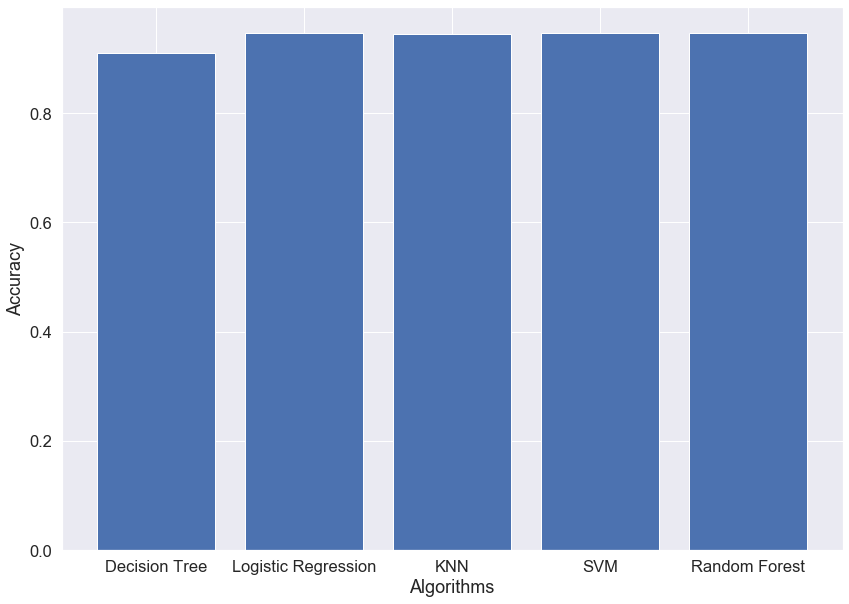

In [293]:
#let's plot for fun

plt.bar(['Decision Tree','Logistic Regression','KNN','SVM','Random Forest'],[ac_dt,ac_lr,ac_knn,ac_sv,ac_rf])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [294]:
#exporting model

import pickle
fname = r'C:\Users\Arvind\Desktop\M-project\finalized_model_lr.sav'
pickle.dump(lr,open(fname,'wb'))